In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
print(plt.style.available)


['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


In [3]:
df_shelter=pd.read_csv('SMIS_Daily_Occupancy_2017.csv', index_col='OCCUPANCY_DATE', dayfirst=True, parse_dates=True)
df_temp=pd.read_csv('eng-daily-01012017-12312017.csv', skiprows=24, index_col='Date/Time', dayfirst=True, parse_dates=True)

FileNotFoundError: File b'SMIS_Daily_Occupancy_2017.csv' does not exist

In [3]:
df_shel_tor_occ_na=df_shelter.dropna(subset=['OCCUPANCY','CAPACITY'])
df_shel_tor_occ=df_shel_tor_occ_na[df_shel_tor_occ_na['CAPACITY']!= 0]

df_shel_tor_occ['O_Rate']=df_shel_tor_occ['OCCUPANCY']/df_shel_tor_occ['CAPACITY']
df_temp['T_Delta']=df_temp['Max Temp (°C)'] - df_temp['Min Temp (°C)']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## 1. General Analysis

In [4]:
ts0=df_shel_tor_occ['CAPACITY'].groupby(df_shel_tor_occ.index).sum()
ts1=df_shel_tor_occ['OCCUPANCY'].groupby(df_shel_tor_occ.index).sum()
ts2=df_shel_tor_occ['O_Rate'].groupby(df_shel_tor_occ.index).mean()
ts3=df_temp['T_Delta'].groupby(df_temp.index).mean().fillna(method='ffill')
ts4=df_temp['Mean Temp (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts5=df_temp['Total Precip (mm)'].groupby(df_temp.index).mean().fillna(0.0)
ts6=df_temp['Max Temp (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts7=df_temp['Min Temp (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts8=df_temp['Snow on Grnd (cm)'].groupby(df_temp.index).mean().fillna(0.0)
ts9=df_temp['Heat Deg Days (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts10=df_temp['Cool Deg Days (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
df_test=pd.concat([ts0,ts1,ts2,ts3,ts4,ts5,ts6,ts7,ts8,ts9,ts10],axis=1)
df_test[0:20]
# df_test.count()

CAPACITY  OCCUPANCY    O_Rate  T_Delta  Mean Temp (°C)  \
Date/Time                                                            
2017-01-01    4653.0       4287  0.933051      3.6             1.3   
2017-01-02    4653.0       4281  0.930695      4.8             3.1   
2017-01-03    4653.0       4288  0.929920      2.4             3.6   
2017-01-04    4653.0       4311  0.937613     11.4            -1.9   
2017-01-05    4653.0       4320  0.937776      5.0            -7.8   
2017-01-06    4653.0       4363  0.954077      5.9            -8.9   
2017-01-07    4653.0       4387  0.964294      5.4            -9.1   
2017-01-08    4653.0       4361  0.955078      2.9            -9.7   
2017-01-09    4653.0       4253  0.932912      7.3            -4.9   
2017-01-10    4663.0       4255  0.932953      8.8             2.7   
2017-01-11    4693.0       4289  0.926412      6.3             5.1   
2017-01-12    4699.0       4310  0.924329     10.8             4.4   
2017-01-13    4699.0       4402  0.944757      7.2            -4.2   
2017-01-14    4699.0       4403  0.946073      6.4            -5.3   
2017-01-15    4699.0       4406  0.952017      4.9            -2.0   
2017-01-16    4699.0       4327  0.932681      7.7            -0.2   
2017-01-17    4699.0       4328  0.939171      1.4             1.9   
2017-01-18    4699.0       4354  0.942016      2.7             3.2   
2017-01-19    4699.0       4349  0.932474      2.2             3.1   
2017-01-20    4699.0       4422  0.955020      2.3             3.1   

            Total Precip (mm)  Max Temp (°C)  Min Temp (°C)  \
Date/Time                                                     
2017-01-01                0.0            3.1           -0.5   
2017-01-02                0.0            5.5            0.7   
2017-01-03               11.3            4.8            2.4   
2017-01-04                0.6            3.8           -7.6   
2017-01-05                0.0           -5.3          -10.3   
2017-01-06                0.0           -5.9          -11.8   
2017-01-07                0.0           -6.4          -11.8   
2017-01-08                0.0           -8.2          -11.1   
2017-01-09                0.0           -1.2           -8.5   
2017-01-10               18.3            7.1           -1.7   
2017-01-11                4.3            8.2            1.9   
2017-01-12               15.6            9.8           -1.0   
2017-01-13                0.0           -0.6           -7.8   
2017-01-14                0.0           -2.1           -8.5   
2017-01-15                0.0            0.5           -4.4   
2017-01-16                0.0            3.7           -4.0   
2017-01-17               13.5            2.6            1.2   
2017-01-18                0.4            4.5            1.8   
2017-01-19                0.0            4.2            2.0   
2017-01-20                0.0            4.2            1.9   

            Snow on Grnd (cm)  Heat Deg Days (°C)  Cool Deg Days (°C)  
Date/Time                                                              
2017-01-01                3.0                16.7                 0.0  
2017-01-02                3.0                14.9                 0.0  
2017-01-03                1.0                14.4                 0.0  
2017-01-04                0.0                19.9                 0.0  
2017-01-05                0.0                25.8                 0.0  
2017-01-06                0.0                26.9                 0.0  
2017-01-07                0.0                27.1                 0.0  
2017-01-08                0.0                27.7                 0.0  
2017-01-09                0.0                22.9                 0.0  
2017-01-10                0.0                15.3                 0.0  
2017-01-11                0.0                12.9                 0.0  
2017-01-12                0.0                13.6                 0.0  
2017-01-13                0.0                22.2                 0.0  
2017

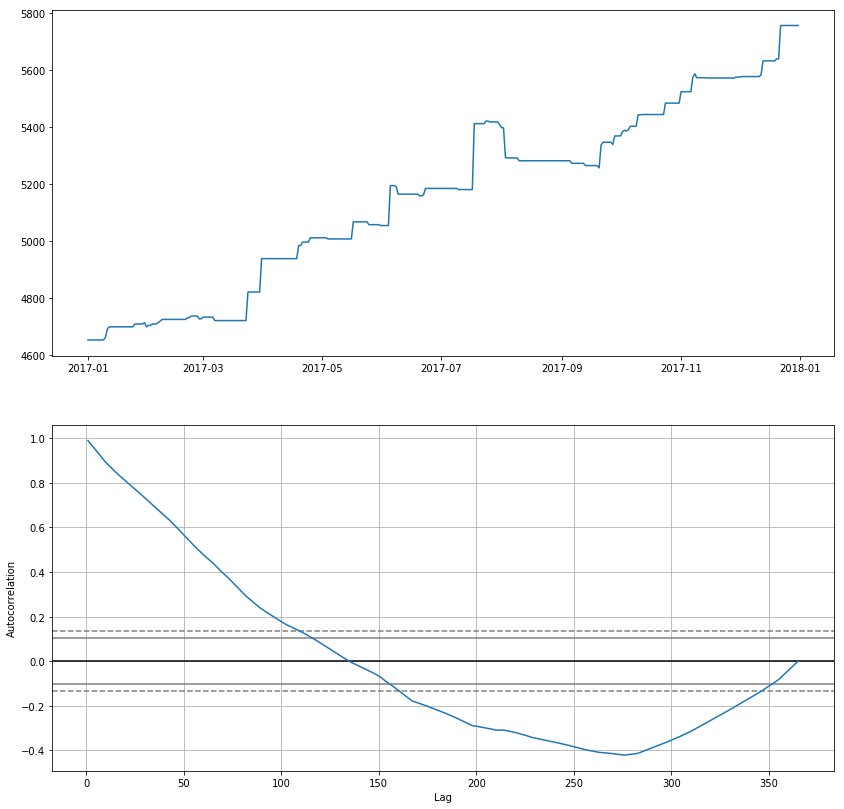

In [5]:
fig, axes = plt.subplots(2,1,figsize=(14, 14))
axes[0].plot(ts0)
pd.plotting.autocorrelation_plot(ts0,ax=axes[1])

### Note below, both the Occupancy and Occupancy Rate show an autocorrelation at each lag 7, and its repeated pattern spikes from Friday to Sunday each week

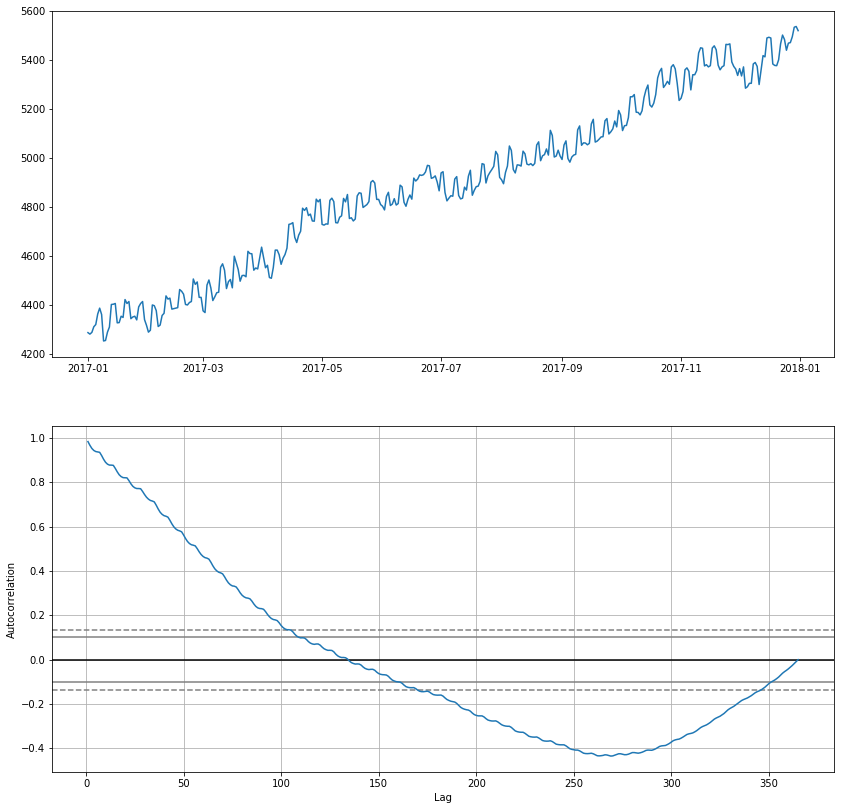

In [6]:
fig, axes = plt.subplots(2,1,figsize=(14, 14))
axes[0].plot(ts1)
pd.plotting.autocorrelation_plot(ts1,ax=axes[1])

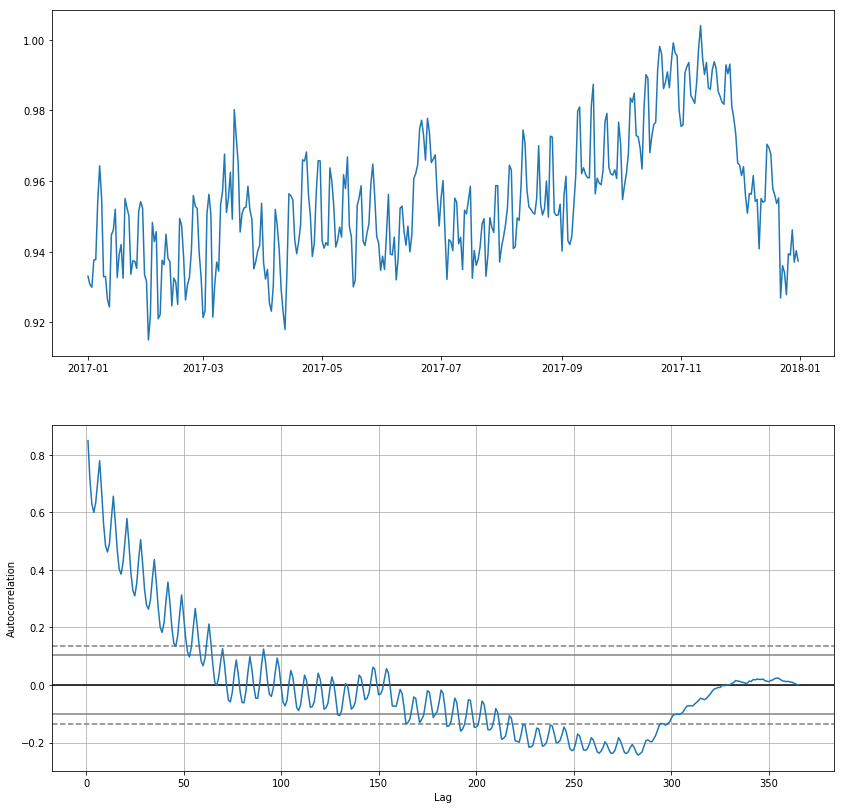

In [7]:
fig, axes = plt.subplots(2,1,figsize=(14, 14))
axes[0].plot(ts2)
pd.plotting.autocorrelation_plot(ts2,ax=axes[1])

Text(0.5,1,'Average Daily O_Rate vs Datetime')

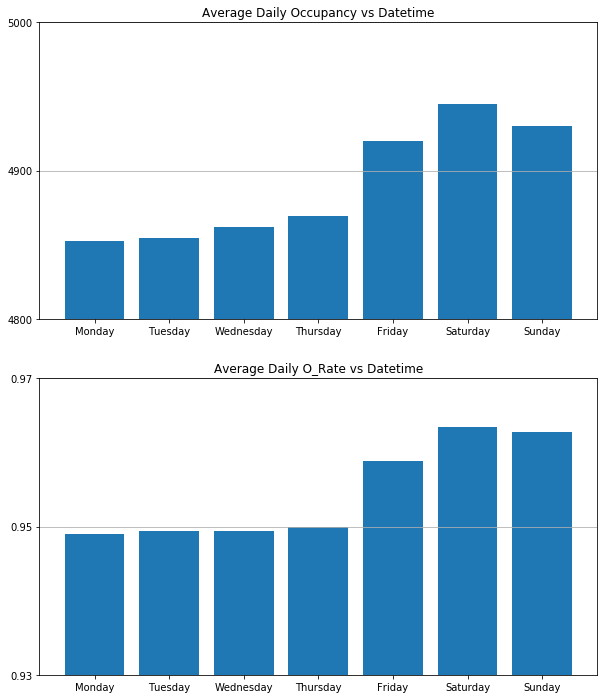

In [8]:

ts1_wd = ts1.copy()
ts2_wd = ts2.copy()
ts1_wd.index = ts1_wd.index.dayofweek
ts2_wd.index = ts2_wd.index.dayofweek

# ts1.index = ts1.index.dayofweek
# ts2.index = ts2.index.dayofweek
# ts1['day_of_week_name'] = df_shel_tor_occ.index.weekday_name

ts1_wd=ts1_wd.groupby(ts1_wd.index).mean() 
ts2_wd=ts2_wd.groupby(ts2_wd.index).mean() 
Weekdaylabels=list(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

figs,axis=plt.subplots(2,1,figsize=(10, 12))

axis[0].bar(ts1_wd.index,ts1_wd)
axis[0].set_xticks(ticks=ts1_wd.index)
axis[0].set_xticklabels(Weekdaylabels)
axis[0].set_yticks([4800,4900,5000])
axis[0].set_ylim((4800,5000))
axis[0].yaxis.grid(True)
axis[0].set_title('Average Daily Occupancy vs Datetime')

axis[1].bar(ts2_wd.index,ts2_wd)
axis[1].set_xticks(ticks=ts2_wd.index)
axis[1].set_xticklabels(Weekdaylabels)
axis[1].set_yticks([0.93,0.95,0.97])
axis[1].set_ylim((0.93,0.97))
axis[1].yaxis.grid(True)
axis[1].set_title('Average Daily O_Rate vs Datetime')

# # horizontal bar
# axis[0].barh(ts1_wd.index,ts1_wd)
# axis[0].set_yticks(ticks=ts1_wd.index)
# axis[0].set_yticklabels(Weekdaylabels)
# axis[0].set_xticks([4800,4900,5000])
# axis[0].set_xlim((4800,5000))
# axis[0].xaxis.grid(True)
# axis[0].set_title('Average Daily Occupancy vs Datetime')


# axis[1].barh(ts2_wd.index,ts2_wd)
# axis[1].set_yticks(ticks=ts2_wd.index)
# axis[1].set_yticklabels(Weekdaylabels)
# axis[1].set_xticks([0.93,0.95,0.97])
# axis[1].set_xlim((0.93,0.97))
# axis[1].xaxis.grid(True)
# axis[1].set_title('Average Daily O_Rate vs Datetime')





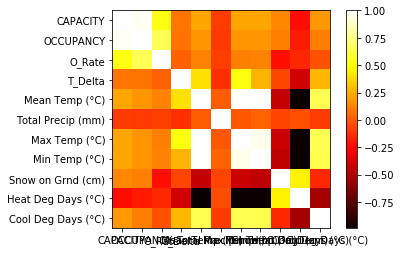

In [9]:
corr = df_test.corr()
corr
len(corr)
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(np.arange(len(corr)), corr.columns)
plt.yticks(np.arange(len(corr)), corr.columns);

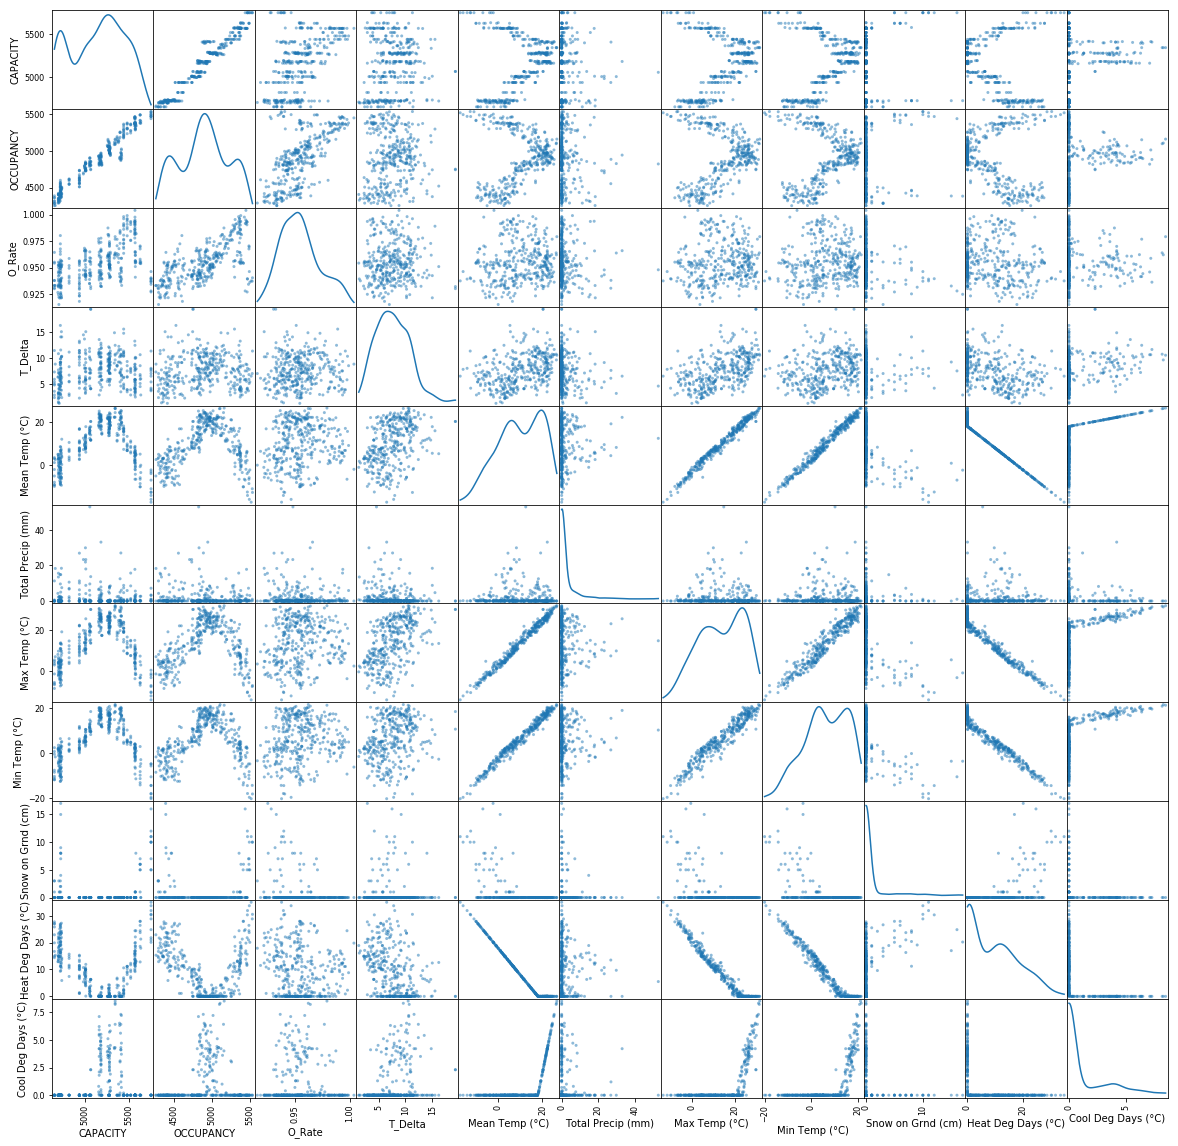

In [10]:
pd.plotting.scatter_matrix(df_test, diagonal='kde', figsize=(20, 20));

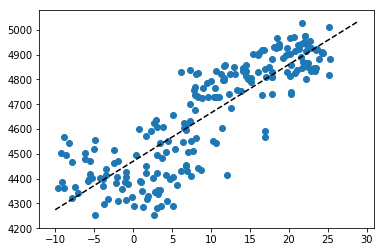

In [11]:
df_t1=pd.concat([ts1,ts4],axis=1)['2017-01-01':'2017-08-01']
import sklearn.linear_model as lm
lreg=lm.LinearRegression()
X=df_t1.fillna(method='ffill')[['Mean Temp (°C)']]
Y=df_t1['OCCUPANCY']
lreg.fit(X,Y)



Test=[[i] for i in np.arange(-10,30,1)]
plt.plot(Test,lreg.predict(Test),'k--')

X1=df_t1.fillna(method='ffill')['Mean Temp (°C)']
Y1=df_t1['OCCUPANCY']
plt.scatter(X1,Y1)

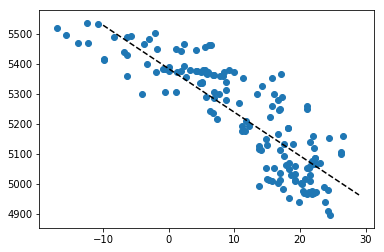

In [12]:
df_t1=pd.concat([ts1,ts4],axis=1)['2017-08-01':'2017-12-31']
import sklearn.linear_model as lm
lreg=lm.LinearRegression()
X=df_t1.fillna(method='ffill')[['Mean Temp (°C)']]
Y=df_t1['OCCUPANCY']
lreg.fit(X,Y)



Test=[[i] for i in np.arange(-10,30,1)]
plt.plot(Test,lreg.predict(Test),'k--')

X1=df_t1.fillna(method='ffill')['Mean Temp (°C)']
Y1=df_t1['OCCUPANCY']
plt.scatter(X1,Y1)

In [13]:
# df_t1=pd.concat([ts1,ts4],axis=1)['2017-01-01':'2017-08-01']
# # df_t1.index=df_t1['T_Delta']
# # df_t1.index=df_t1['Min Temp (°C)']
# df_t1.index=df_t1['Mean Temp (°C)']
# # df_t1=df_t1[['O_Rate']]

# df_t1=df_t1[['OCCUPANCY']]
# Y=df_t1
# X=df_t1.index
# plt.scatter(X,Y)

## 2. Different Sectors Analysis

In [14]:
ts1all=df_shel_tor_occ[['OCCUPANCY','CAPACITY','SECTOR']].groupby([df_shel_tor_occ.index,'SECTOR']).sum()
ts1all['O_Rate']=ts1all['OCCUPANCY']/ts1all['CAPACITY']
ts1_c=ts1all.loc[pd.IndexSlice[:, ['Co-ed']],]
ts1_c.index=ts1_c.index.droplevel(level=1)
ts1_c

ts1_f=ts1all.loc[pd.IndexSlice[:, ['Families']],]
ts1_f.index=ts1_f.index.droplevel(level=1)
ts1_f

ts1_m=ts1all.loc[pd.IndexSlice[:, ['Men']],]
ts1_m.index=ts1_m.index.droplevel(level=1)
ts1_m

ts1_w=ts1all.loc[pd.IndexSlice[:, ['Women']],]
ts1_w.index=ts1_w.index.droplevel(level=1)
ts1_w

ts1_y=ts1all.loc[pd.IndexSlice[:, ['Youth']],]
ts1_y.index=ts1_y.index.droplevel(level=1)
ts1_y

OCCUPANCY  CAPACITY    O_Rate
OCCUPANCY_DATE                               
2017-01-01            499     518.0  0.963320
2017-01-02            501     518.0  0.967181
2017-01-03            497     518.0  0.959459
2017-01-04            499     518.0  0.963320
2017-01-05            501     518.0  0.967181
2017-01-06            505     518.0  0.974903
2017-01-07            509     518.0  0.982625
2017-01-08            509     518.0  0.982625
2017-01-09            503     518.0  0.971042
2017-01-10            498     518.0  0.961390
...                   ...       ...       ...
2017-12-22            510     525.0  0.971429
2017-12-23            516     525.0  0.982857
2017-12-24            512     525.0  0.975238
2017-12-25            513     525.0  0.977143
2017-12-26            515     525.0  0.980952
2017-12-27            514     525.0  0.979048
2017-12-28            518     525.0  0.986667
2017-12-29            515     525.0  0.980952
2017-12-30            514     525.0  0.979048
2017-12-31            514     525.0  0.979048

[365 rows x 3 columns]

### 2.1  'Co-ed' Sector

Text(0.5,1,'O_Rate autocorrelation')

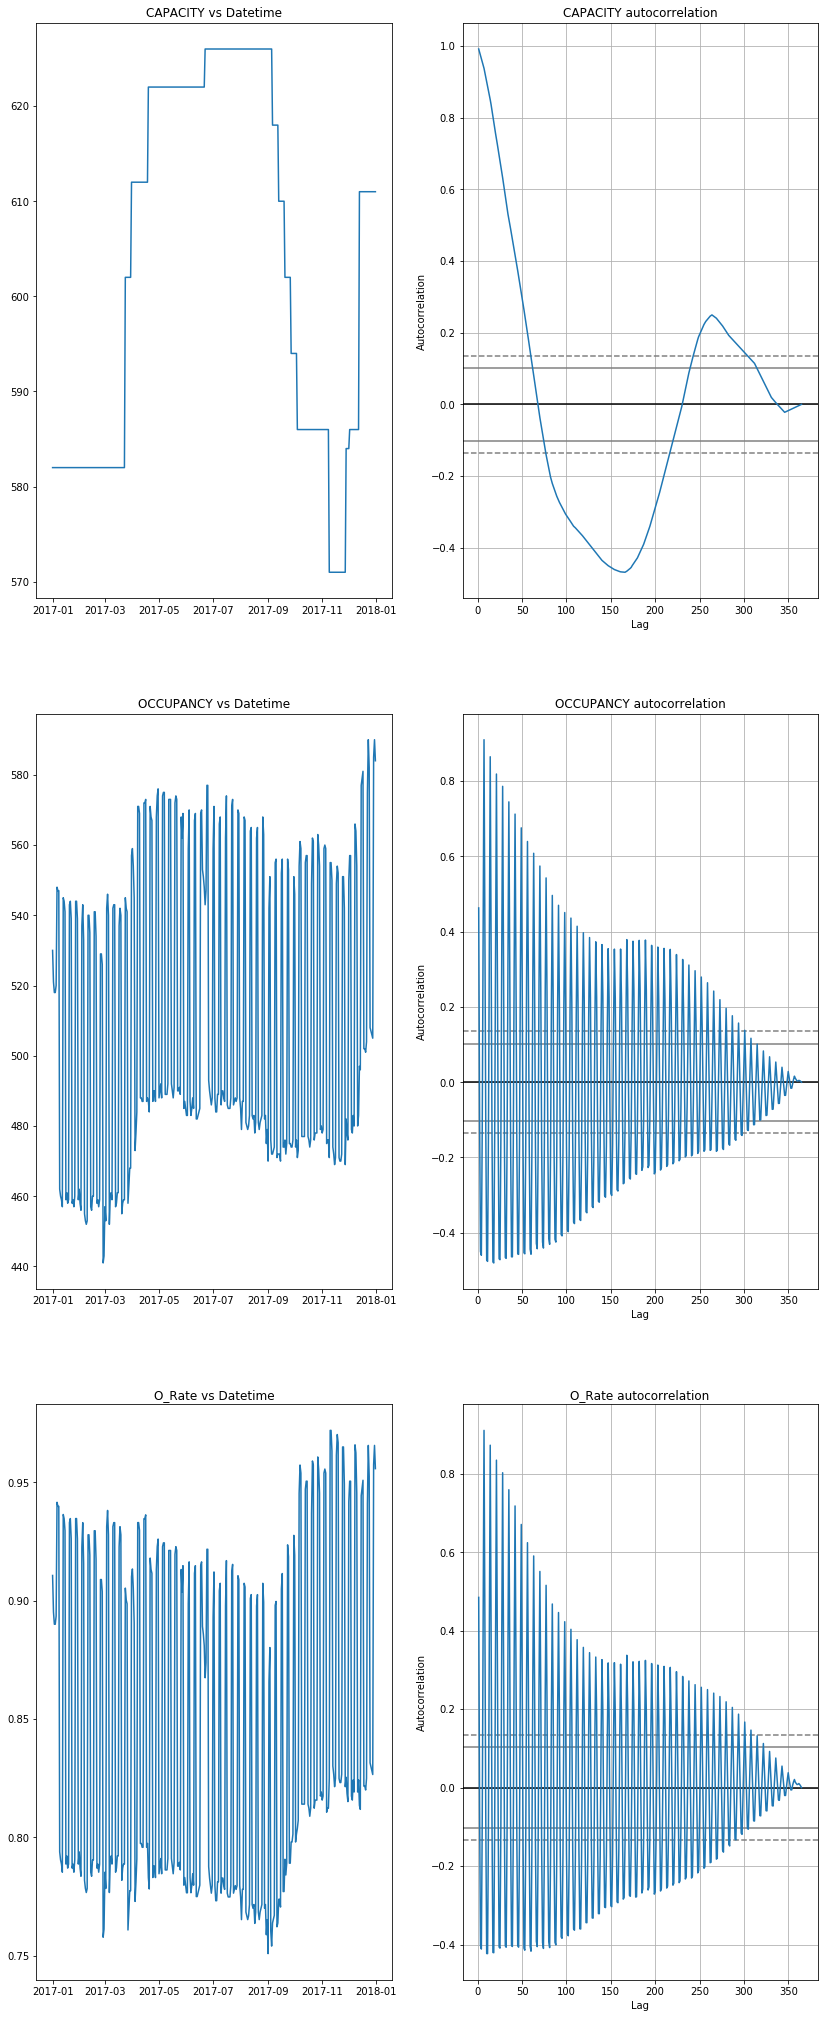

In [15]:
df_start=ts1_c
ts0=df_start['CAPACITY']
ts1=df_start['OCCUPANCY']
ts2=df_start['O_Rate']
ts3=df_temp['T_Delta'].groupby(df_temp.index).mean().fillna(method='ffill')
ts4=df_temp['Mean Temp (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts5=df_temp['Total Precip (mm)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts6=df_temp['Max Temp (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts7=df_temp['Min Temp (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts8=df_temp['Snow on Grnd (cm)'].groupby(df_temp.index).mean().fillna(0.0)
ts9=df_temp['Heat Deg Days (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts10=df_temp['Cool Deg Days (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
df_test=pd.concat([ts0,ts1,ts2,ts3,ts4,ts5,ts6,ts7,ts8,ts9,ts10],axis=1)

fig, axes = plt.subplots(3,2,figsize=(14, 36))
axes[0,0].plot(ts0)
pd.plotting.autocorrelation_plot(ts0,ax=axes[0,1])
axes[1,0].plot(ts1)
pd.plotting.autocorrelation_plot(ts1,ax=axes[1,1])
axes[2,0].plot(ts2)
pd.plotting.autocorrelation_plot(ts2,ax=axes[2,1])

axes[0,0].set_title('CAPACITY vs Datetime')
axes[0,1].set_title('CAPACITY autocorrelation')
axes[1,0].set_title('OCCUPANCY vs Datetime')
axes[1,1].set_title('OCCUPANCY autocorrelation')
axes[2,0].set_title('O_Rate vs Datetime')
axes[2,1].set_title('O_Rate autocorrelation')

Text(0.5,1,'Average Daily O_Rate vs Datetime')

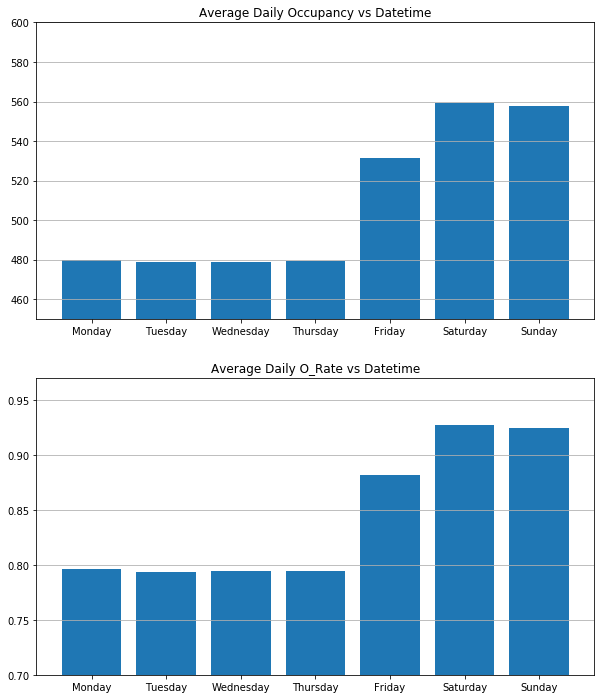

In [16]:
ts1_wd_c = ts1.copy()
ts2_wd_c = ts2.copy()
ts1_wd_c.index = ts1_wd_c.index.dayofweek
ts2_wd_c.index = ts2_wd_c.index.dayofweek

# ts1.index = ts1.index.dayofweek
# ts2.index = ts2.index.dayofweek
# ts1['day_of_week_name'] = df_shel_tor_occ.index.weekday_name

ts1_wd_c=ts1_wd_c.groupby(ts1_wd_c.index).mean() 
ts2_wd_c=ts2_wd_c.groupby(ts2_wd_c.index).mean() 
Weekdaylabels=list(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

figs,axis=plt.subplots(2,1,figsize=(10, 12))

axis[0].bar(ts1_wd_c.index,ts1_wd_c)
axis[0].set_xticks(ticks=ts1_wd_c.index)
axis[0].set_xticklabels(Weekdaylabels)
# axis[0].set_yticks([4800,4900,5000])
axis[0].set_ylim((450,600))
axis[0].yaxis.grid(True)
axis[0].set_title('Average Daily Occupancy vs Datetime')

axis[1].bar(ts2_wd_c.index,ts2_wd_c)
axis[1].set_xticks(ticks=ts2_wd_c.index)
axis[1].set_xticklabels(Weekdaylabels)
# axis[1].set_yticks([0.93,0.95,0.97])
axis[1].set_ylim((0.7,0.97))
axis[1].yaxis.grid(True)
axis[1].set_title('Average Daily O_Rate vs Datetime')

# # horizontal bar
# axis[0].barh(ts1_wd.index,ts1_wd)
# axis[0].set_yticks(ticks=ts1_wd.index)
# axis[0].set_yticklabels(Weekdaylabels)
# axis[0].set_xticks([4800,4900,5000])
# axis[0].set_xlim((4800,5000))
# axis[0].xaxis.grid(True)
# axis[0].set_title('Average Daily Occupancy vs Datetime')


# axis[1].barh(ts2_wd.index,ts2_wd)
# axis[1].set_yticks(ticks=ts2_wd.index)
# axis[1].set_yticklabels(Weekdaylabels)
# axis[1].set_xticks([0.93,0.95,0.97])
# axis[1].set_xlim((0.93,0.97))
# axis[1].xaxis.grid(True)
# axis[1].set_title('Average Daily O_Rate vs Datetime')


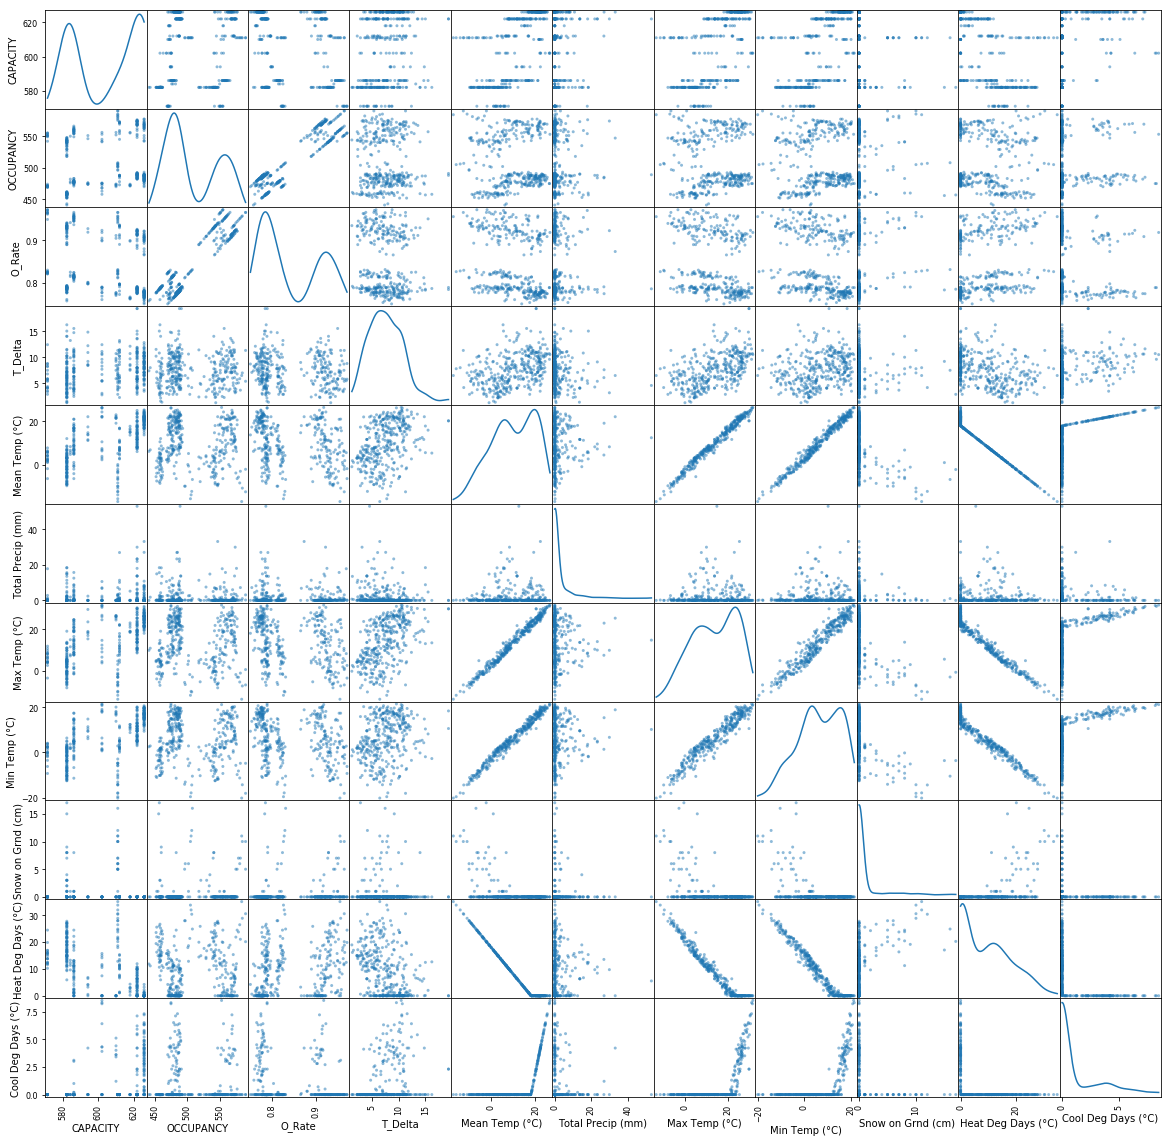

In [17]:
pd.plotting.scatter_matrix(df_test, diagonal='kde', figsize=(20, 20));

### 2.2 'Families' Sector

Text(0.5,1,'O_Rate autocorrelation')

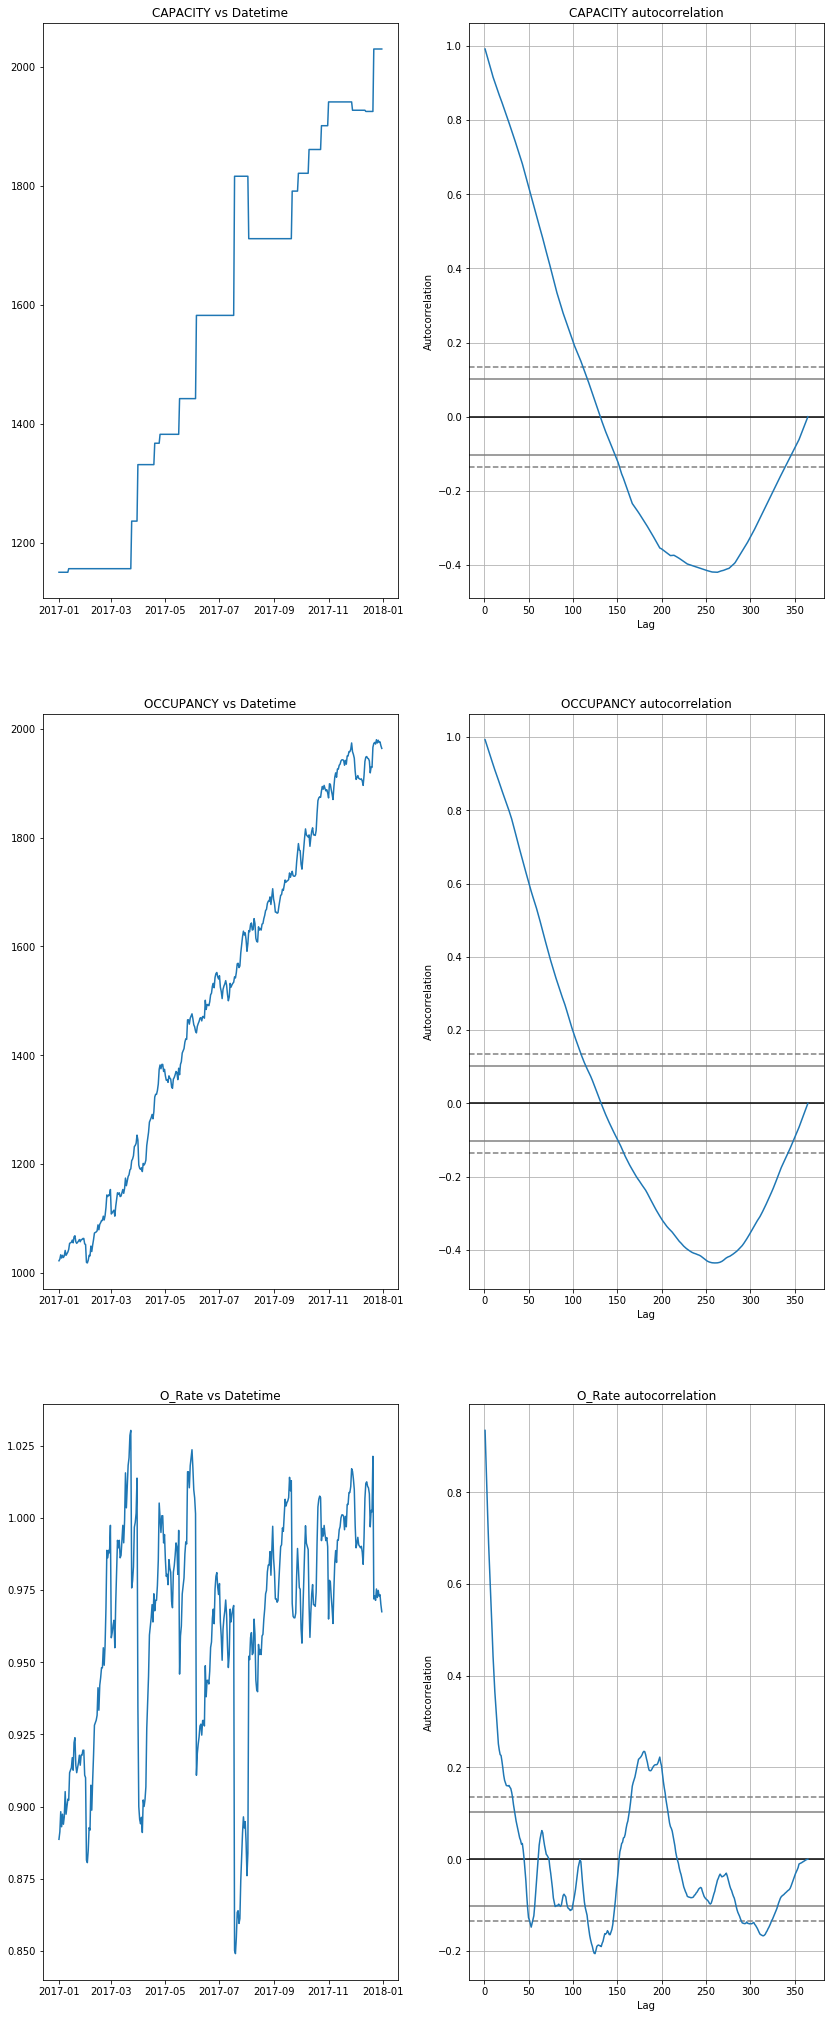

In [18]:
df_start=ts1_f
ts0=df_start['CAPACITY']
ts1=df_start['OCCUPANCY']
ts2=df_start['O_Rate']
ts3=df_temp['T_Delta'].groupby(df_temp.index).mean().fillna(method='ffill')
ts4=df_temp['Mean Temp (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts5=df_temp['Total Precip (mm)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts6=df_temp['Max Temp (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts7=df_temp['Min Temp (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts8=df_temp['Snow on Grnd (cm)'].groupby(df_temp.index).mean().fillna(0.0)
ts9=df_temp['Heat Deg Days (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts10=df_temp['Cool Deg Days (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
df_test=pd.concat([ts0,ts1,ts2,ts3,ts4,ts5,ts6,ts7,ts8,ts9,ts10],axis=1)

fig, axes = plt.subplots(3,2,figsize=(14, 36))
axes[0,0].plot(ts0)
pd.plotting.autocorrelation_plot(ts0,ax=axes[0,1])
axes[1,0].plot(ts1)
pd.plotting.autocorrelation_plot(ts1,ax=axes[1,1])
axes[2,0].plot(ts2)
pd.plotting.autocorrelation_plot(ts2,ax=axes[2,1])
axes[0,0].set_title('CAPACITY vs Datetime')
axes[0,1].set_title('CAPACITY autocorrelation')
axes[1,0].set_title('OCCUPANCY vs Datetime')
axes[1,1].set_title('OCCUPANCY autocorrelation')
axes[2,0].set_title('O_Rate vs Datetime')
axes[2,1].set_title('O_Rate autocorrelation')


Text(0.5,1,'Average Daily O_Rate vs Datetime')

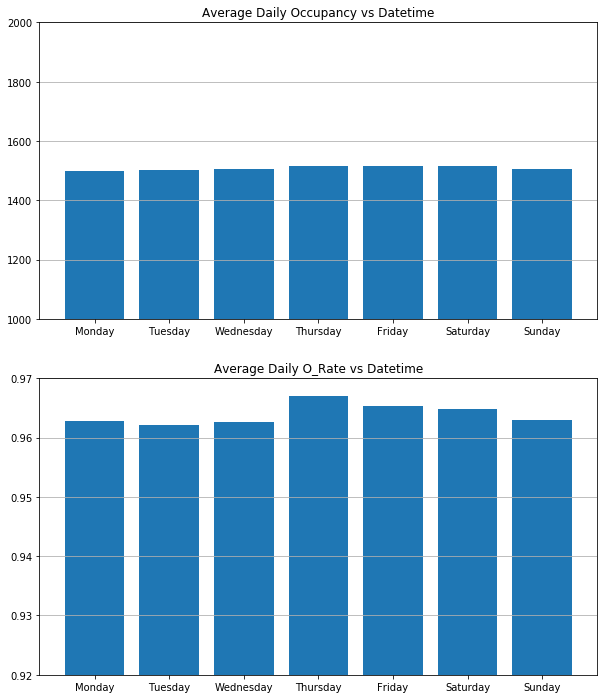

In [19]:
ts1_wd_f = ts1.copy()
ts2_wd_f = ts2.copy()
ts1_wd_f.index = ts1_wd_f.index.dayofweek
ts2_wd_f.index = ts2_wd_f.index.dayofweek

# ts1.index = ts1.index.dayofweek
# ts2.index = ts2.index.dayofweek
# ts1['day_of_week_name'] = df_shel_tor_occ.index.weekday_name

ts1_wd_f=ts1_wd_f.groupby(ts1_wd_f.index).mean() 
ts2_wd_f=ts2_wd_f.groupby(ts2_wd_f.index).mean() 
Weekdaylabels=list(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

figs,axis=plt.subplots(2,1,figsize=(10, 12))

axis[0].bar(ts1_wd_f.index,ts1_wd_f)
axis[0].set_xticks(ticks=ts1_wd_f.index)
axis[0].set_xticklabels(Weekdaylabels)
# axis[0].set_yticks([4800,4900,5000])
axis[0].set_ylim((1000,2000))
axis[0].yaxis.grid(True)
axis[0].set_title('Average Daily Occupancy vs Datetime')

axis[1].bar(ts2_wd_f.index,ts2_wd_f)
axis[1].set_xticks(ticks=ts2_wd_f.index)
axis[1].set_xticklabels(Weekdaylabels)
# axis[1].set_yticks([0.93,0.95,0.97])
axis[1].set_ylim((0.92,0.97))
axis[1].yaxis.grid(True)
axis[1].set_title('Average Daily O_Rate vs Datetime')

# # horizontal bar
# axis[0].barh(ts1_wd.index,ts1_wd)
# axis[0].set_yticks(ticks=ts1_wd.index)
# axis[0].set_yticklabels(Weekdaylabels)
# axis[0].set_xticks([4800,4900,5000])
# axis[0].set_xlim((4800,5000))
# axis[0].xaxis.grid(True)
# axis[0].set_title('Average Daily Occupancy vs Datetime')


# axis[1].barh(ts2_wd.index,ts2_wd)
# axis[1].set_yticks(ticks=ts2_wd.index)
# axis[1].set_yticklabels(Weekdaylabels)
# axis[1].set_xticks([0.93,0.95,0.97])
# axis[1].set_xlim((0.93,0.97))
# axis[1].xaxis.grid(True)
# axis[1].set_title('Average Daily O_Rate vs Datetime')

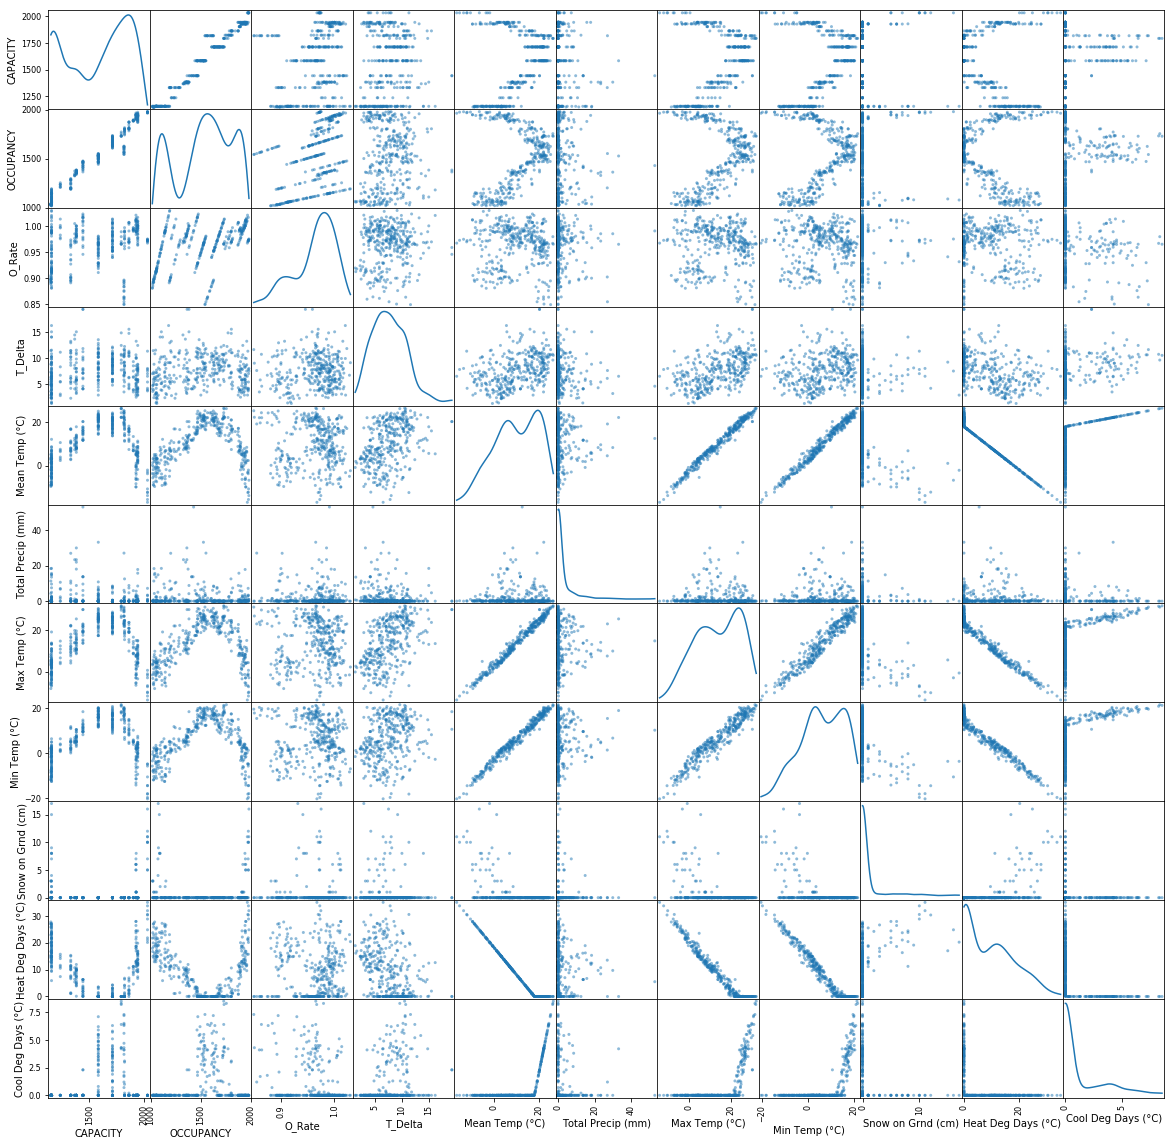

In [20]:
pd.plotting.scatter_matrix(df_test, diagonal='kde', figsize=(20, 20));

### 2.3 'Men' Sector

Text(0.5,1,'O_Rate autocorrelation')

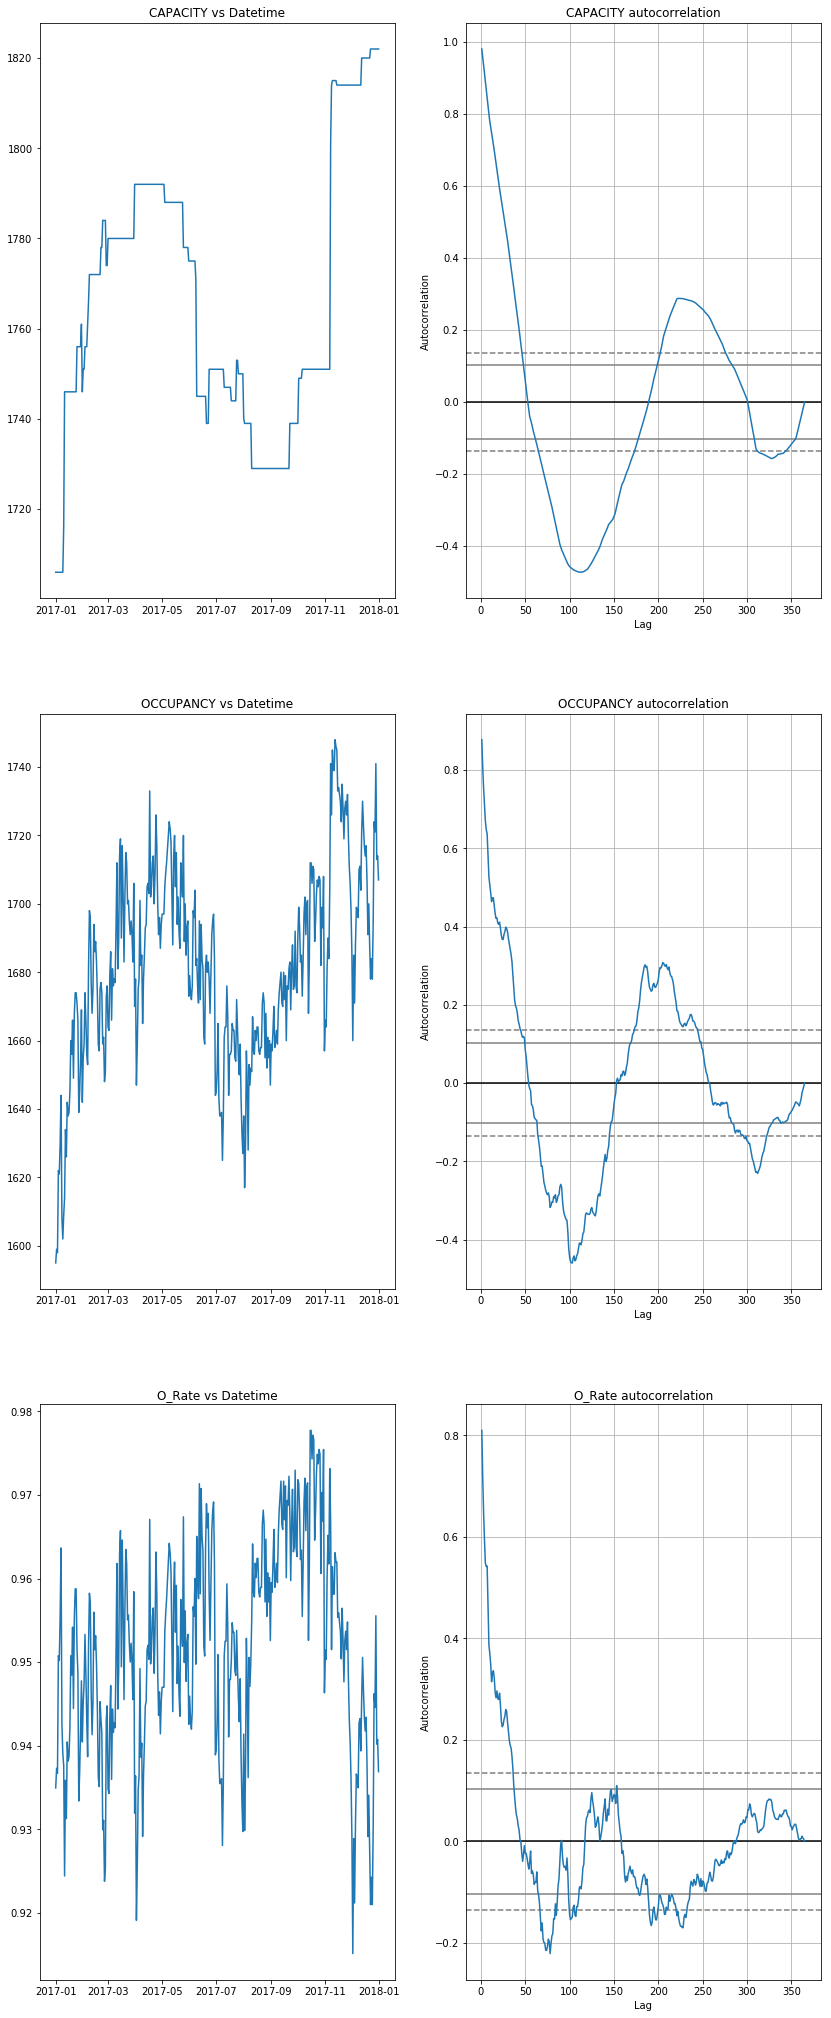

In [21]:
df_start=ts1_m
ts0=df_start['CAPACITY']
ts1=df_start['OCCUPANCY']
ts2=df_start['O_Rate']
ts3=df_temp['T_Delta'].groupby(df_temp.index).mean().fillna(method='ffill')
ts4=df_temp['Mean Temp (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts5=df_temp['Total Precip (mm)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts6=df_temp['Max Temp (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts7=df_temp['Min Temp (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts8=df_temp['Snow on Grnd (cm)'].groupby(df_temp.index).mean().fillna(0.0)
ts9=df_temp['Heat Deg Days (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts10=df_temp['Cool Deg Days (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
df_test=pd.concat([ts0,ts1,ts2,ts3,ts4,ts5,ts6,ts7,ts8,ts9,ts10],axis=1)

fig, axes = plt.subplots(3,2,figsize=(14, 36))
axes[0,0].plot(ts0)
pd.plotting.autocorrelation_plot(ts0,ax=axes[0,1])
axes[1,0].plot(ts1)
pd.plotting.autocorrelation_plot(ts1,ax=axes[1,1])
axes[2,0].plot(ts2)
pd.plotting.autocorrelation_plot(ts2,ax=axes[2,1])

axes[0,0].set_title('CAPACITY vs Datetime')
axes[0,1].set_title('CAPACITY autocorrelation')
axes[1,0].set_title('OCCUPANCY vs Datetime')
axes[1,1].set_title('OCCUPANCY autocorrelation')
axes[2,0].set_title('O_Rate vs Datetime')
axes[2,1].set_title('O_Rate autocorrelation')

In [22]:
ts1_wd_m = ts1.copy()
ts2_wd_m = ts2.copy()
ts1_wd_m.index = ts1_wd_m.index.dayofweek
ts2_wd_m.index = ts2_wd_m.index.dayofweek

# ts1.index = ts1.index.dayofweek
# ts2.index = ts2.index.dayofweek
# ts1['day_of_week_name'] = df_shel_tor_occ.index.weekday_name

ts1_wd_m=ts1_wd_m.groupby(ts1_wd_m.index).mean() 
ts2_wd_m=ts2_wd_m.groupby(ts2_wd_m.index).mean() 
Weekdaylabels=list(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

figs,axis=plt.subplots(2,1,figsize=(10, 12))

axis[0].bar(ts1_wd_m.index,ts1_wd_m)
axis[0].set_xticks(ticks=ts1_wd_m.index)
axis[0].set_xticklabels(Weekdaylabels)
# axis[0].set_yticks([4800,4900,5000])
axis[0].set_ylim((1200,1800))
axis[0].yaxis.grid(True)
axis[0].set_title('Average Daily Occupancy vs Datetime')

axis[1].bar(ts2_wd_m.index,ts2_wd_m)
axis[1].set_xticks(ticks=ts2_wd_m.index)
axis[1].set_xticklabels(Weekdaylabels)
# axis[1].set_yticks([0.93,0.95,0.97])
axis[1].set_ylim((0.92,0.97))
axis[1].yaxis.grid(True)
axis[1].set_title('Average Daily O_Rate vs Datetime')


Text(0.5,1,'Average Daily O_Rate vs Datetime')

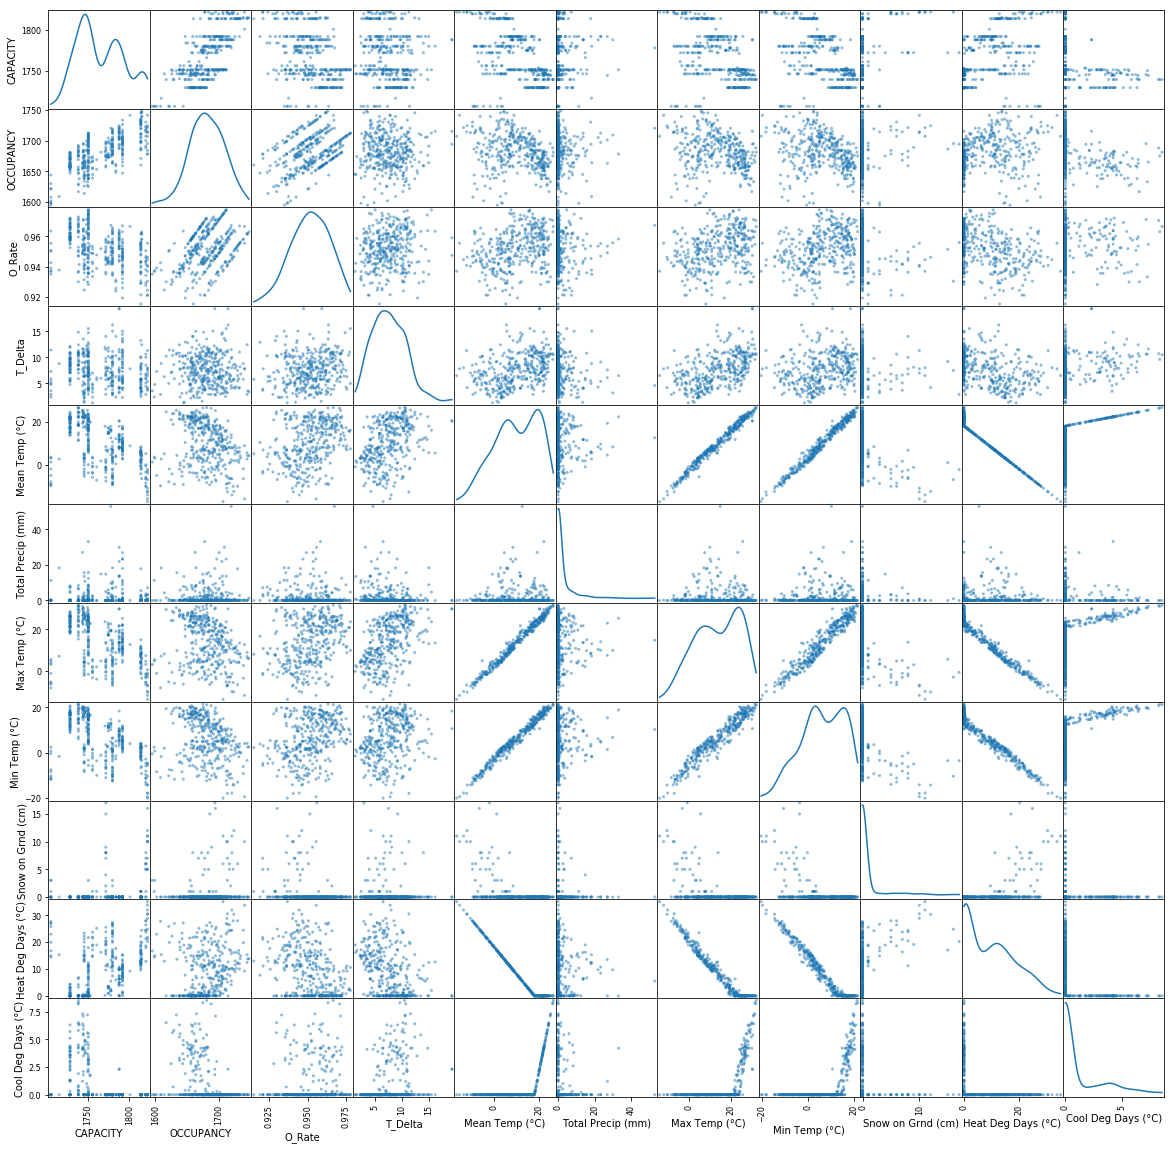

In [23]:
pd.plotting.scatter_matrix(df_test, diagonal='kde', figsize=(20, 20));

### 2.4 'Women' Sector

In [24]:
df_start=ts1_w
ts0=df_start['CAPACITY']
ts1=df_start['OCCUPANCY']
ts2=df_start['O_Rate']
ts3=df_temp['T_Delta'].groupby(df_temp.index).mean().fillna(method='ffill')
ts4=df_temp['Mean Temp (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts5=df_temp['Total Precip (mm)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts6=df_temp['Max Temp (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts7=df_temp['Min Temp (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts8=df_temp['Snow on Grnd (cm)'].groupby(df_temp.index).mean().fillna(0.0)
ts9=df_temp['Heat Deg Days (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts10=df_temp['Cool Deg Days (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
df_test=pd.concat([ts0,ts1,ts2,ts3,ts4,ts5,ts6,ts7,ts8,ts9,ts10],axis=1)

fig, axes = plt.subplots(3,2,figsize=(14, 36))
axes[0,0].plot(ts0)
pd.plotting.autocorrelation_plot(ts0,ax=axes[0,1])
axes[1,0].plot(ts1)
pd.plotting.autocorrelation_plot(ts1,ax=axes[1,1])
axes[2,0].plot(ts2)
pd.plotting.autocorrelation_plot(ts2,ax=axes[2,1])

axes[0,0].set_title('CAPACITY vs Datetime')
axes[0,1].set_title('CAPACITY autocorrelation')
axes[1,0].set_title('OCCUPANCY vs Datetime')
axes[1,1].set_title('OCCUPANCY autocorrelation')
axes[2,0].set_title('O_Rate vs Datetime')
axes[2,1].set_title('O_Rate autocorrelation')


Text(0.5,1,'O_Rate autocorrelation')

In [25]:
ts1_wd_w = ts1.copy()
ts2_wd_w = ts2.copy()
ts1_wd_w.index = ts1_wd_w.index.dayofweek
ts2_wd_w.index = ts2_wd_w.index.dayofweek

# ts1.index = ts1.index.dayofweek
# ts2.index = ts2.index.dayofweek
# ts1['day_of_week_name'] = df_shel_tor_occ.index.weekday_name

ts1_wd_w=ts1_wd_w.groupby(ts1_wd_w.index).mean() 
ts2_wd_w=ts2_wd_w.groupby(ts2_wd_w.index).mean() 
Weekdaylabels=list(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

figs,axis=plt.subplots(2,1,figsize=(10, 12))

axis[0].bar(ts1_wd_w.index,ts1_wd_w)
axis[0].set_xticks(ticks=ts1_wd_w.index)
axis[0].set_xticklabels(Weekdaylabels)
# axis[0].set_yticks([4800,4900,5000])
axis[0].set_ylim((600,700))
axis[0].yaxis.grid(True)
axis[0].set_title('Average Daily Occupancy vs Datetime')

axis[1].bar(ts2_wd_w.index,ts2_wd_w)
axis[1].set_xticks(ticks=ts2_wd_w.index)
axis[1].set_xticklabels(Weekdaylabels)
# axis[1].set_yticks([0.93,0.95,0.97])
axis[1].set_ylim((0.95,0.99))
axis[1].yaxis.grid(True)
axis[1].set_title('Average Daily O_Rate vs Datetime')

Text(0.5,1,'Average Daily O_Rate vs Datetime')

In [26]:
pd.plotting.scatter_matrix(df_test, diagonal='kde', figsize=(20, 20));

### 2.5 'Youth' Sector

In [27]:
df_start=ts1_y
ts0=df_start['CAPACITY']
ts1=df_start['OCCUPANCY']
ts2=df_start['O_Rate']
ts3=df_temp['T_Delta'].groupby(df_temp.index).mean().fillna(method='ffill')
ts4=df_temp['Mean Temp (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts5=df_temp['Total Precip (mm)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts6=df_temp['Max Temp (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts7=df_temp['Min Temp (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts8=df_temp['Snow on Grnd (cm)'].groupby(df_temp.index).mean().fillna(0.0)
ts9=df_temp['Heat Deg Days (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
ts10=df_temp['Cool Deg Days (°C)'].groupby(df_temp.index).mean().fillna(method='ffill')
df_test=pd.concat([ts0,ts1,ts2,ts3,ts4,ts5,ts6,ts7,ts8,ts9,ts10],axis=1)

fig, axes = plt.subplots(3,2,figsize=(14, 36))
axes[0,0].plot(ts0)
pd.plotting.autocorrelation_plot(ts0,ax=axes[0,1])
axes[1,0].plot(ts1)
pd.plotting.autocorrelation_plot(ts1,ax=axes[1,1])
axes[2,0].plot(ts2)
pd.plotting.autocorrelation_plot(ts2,ax=axes[2,1])

axes[0,0].set_title('CAPACITY vs Datetime')
axes[0,1].set_title('CAPACITY autocorrelation')
axes[1,0].set_title('OCCUPANCY vs Datetime')
axes[1,1].set_title('OCCUPANCY autocorrelation')
axes[2,0].set_title('O_Rate vs Datetime')
axes[2,1].set_title('O_Rate autocorrelation')

Text(0.5,1,'O_Rate autocorrelation')

Text(0.5,1,'Average Daily O_Rate vs Datetime')

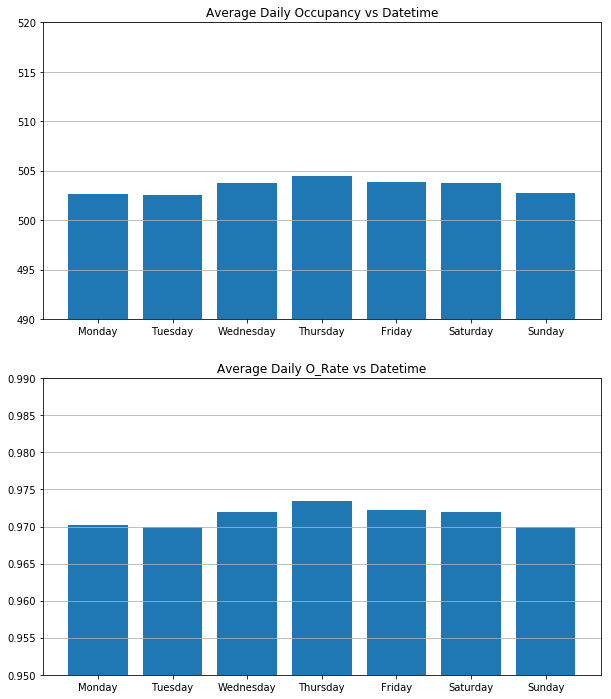

In [28]:
ts1_wd_y = ts1.copy()
ts2_wd_y = ts2.copy()
ts1_wd_y.index = ts1_wd_y.index.dayofweek
ts2_wd_y.index = ts2_wd_y.index.dayofweek

# ts1.index = ts1.index.dayofweek
# ts2.index = ts2.index.dayofweek
# ts1['day_of_week_name'] = df_shel_tor_occ.index.weekday_name

ts1_wd_y=ts1_wd_y.groupby(ts1_wd_y.index).mean() 
ts2_wd_y=ts2_wd_y.groupby(ts2_wd_y.index).mean() 
Weekdaylabels=list(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

figs,axis=plt.subplots(2,1,figsize=(10, 12))

axis[0].bar(ts1_wd_y.index,ts1_wd_y)
axis[0].set_xticks(ticks=ts1_wd_y.index)
axis[0].set_xticklabels(Weekdaylabels)
# axis[0].set_yticks([4800,4900,5000])
axis[0].set_ylim((490,520))
axis[0].yaxis.grid(True)
axis[0].set_title('Average Daily Occupancy vs Datetime')

axis[1].bar(ts2_wd_y.index,ts2_wd_y)
axis[1].set_xticks(ticks=ts2_wd_y.index)
axis[1].set_xticklabels(Weekdaylabels)
# axis[1].set_yticks([0.93,0.95,0.97])
axis[1].set_ylim((0.95,0.99))
axis[1].yaxis.grid(True)
axis[1].set_title('Average Daily O_Rate vs Datetime')

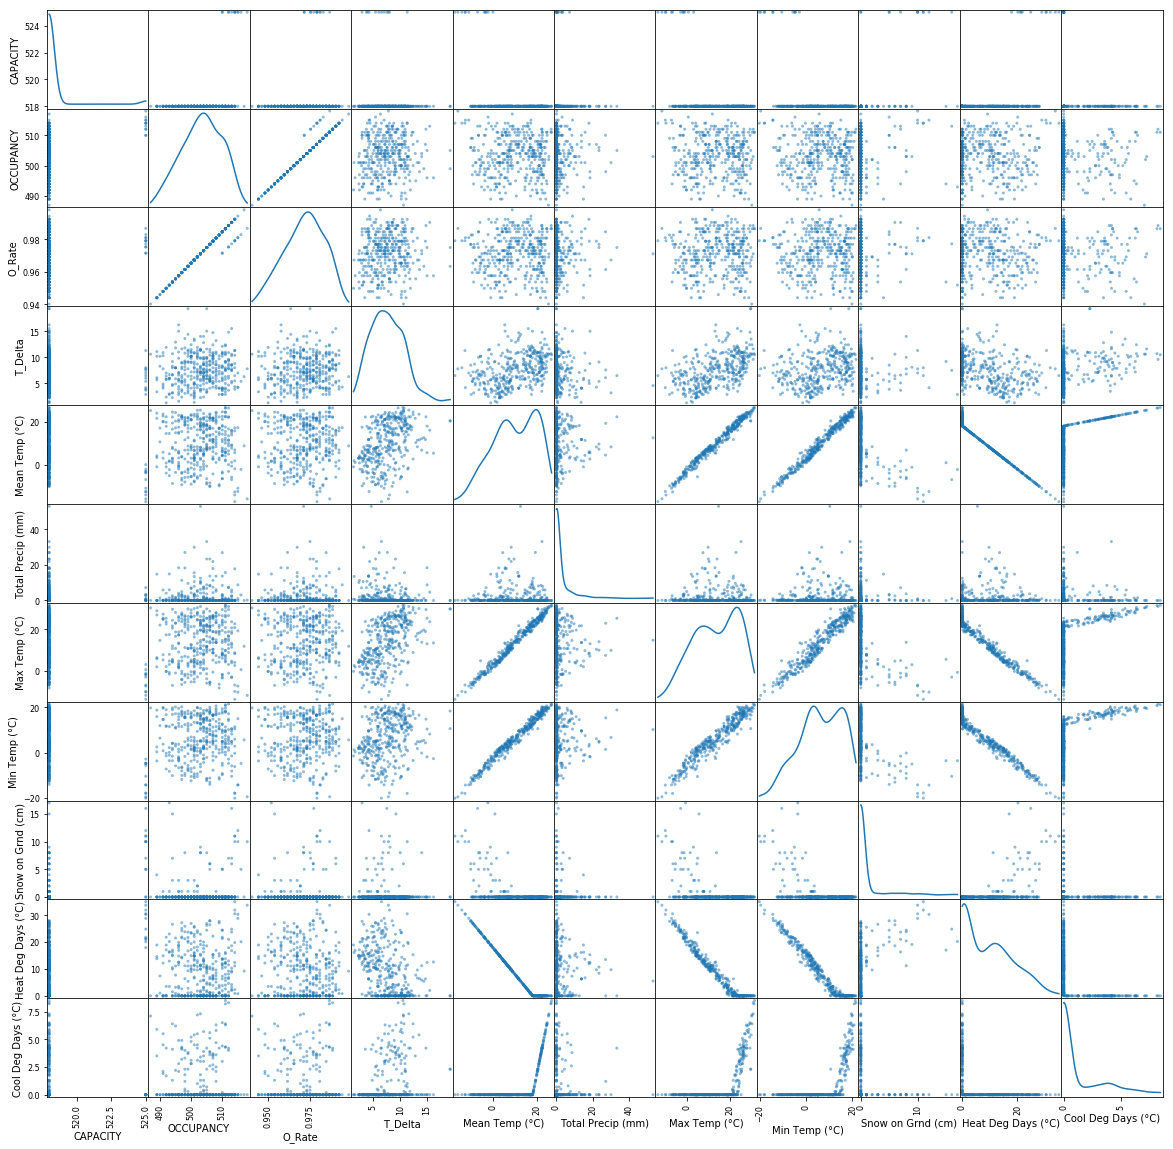

In [29]:
pd.plotting.scatter_matrix(df_test, diagonal='kde', figsize=(20, 20));

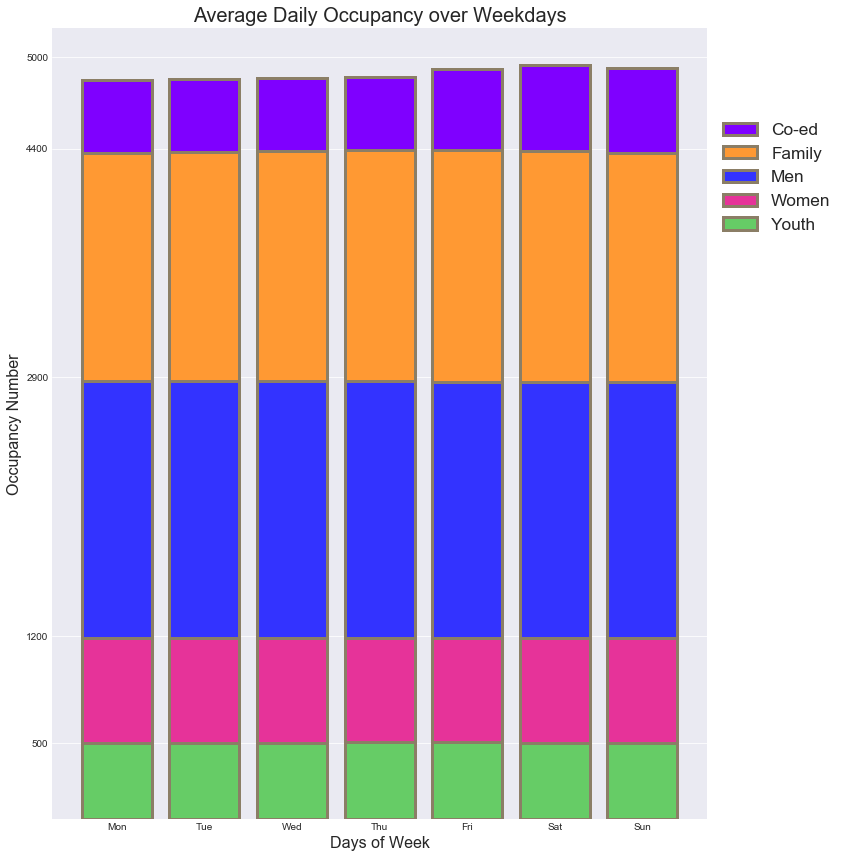

In [30]:
# ax.bar(xlocations, alphas,label='alpha', color='tan',align='center')
# ax.bar(xlocations, betas, width,label='beta', color='wheat',align='center', bottom=alphas)
plt.style.use('seaborn-dark')

figs,axis=plt.subplots(figsize=(10, 12))
Weekdaylabels=list(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

axis.bar(ts1_wd_c.index,ts1_wd_c, label='Co-ed', color=(0.498, 0, 1) ,bottom=ts1_wd_f + ts1_wd_m + ts1_wd_w + ts1_wd_y, edgecolor='#8B7E66',linewidth=3.0)
axis.bar(ts1_wd_f.index,ts1_wd_f, label='Family', color=(1, 0.6, 0.2), bottom=ts1_wd_m + ts1_wd_w + ts1_wd_y, edgecolor='#8B7E66',linewidth=3.0)
axis.bar(ts1_wd_m.index,ts1_wd_m, label='Men', color=(0.2, 0.2, 1), bottom= ts1_wd_w + ts1_wd_y,edgecolor='#8B7E66',linewidth=3.0)
axis.bar(ts1_wd_w.index,ts1_wd_w, label='Women', color=(0.9, 0.2, 0.6), bottom= ts1_wd_y, edgecolor='#8B7E66',linewidth=3.0)
axis.bar(ts1_wd_y.index,ts1_wd_y, label='Youth', color=(0.4, 0.8, 0.4), edgecolor='#8B7E66',linewidth=3.0)


axis.set_xticks(ticks=ts1_wd_c.index)
axis.set_xticklabels(Weekdaylabels)
axis.legend(bbox_to_anchor=(1, 0.9),ncol=1, prop={'size':'xx-large'})

axis.set_title('Average Daily Occupancy over Weekdays',  fontsize=20)
axis.set_yticks([500,1200,2900,4400,5000])
axis.yaxis.grid(True)
axis.set_ylabel('Occupancy Number', fontsize=16)
axis.set_xlabel('Days of Week',  fontsize=16)
figs.tight_layout(pad=1)

# fig.savefig('general_bar_1.png', dpi=125)





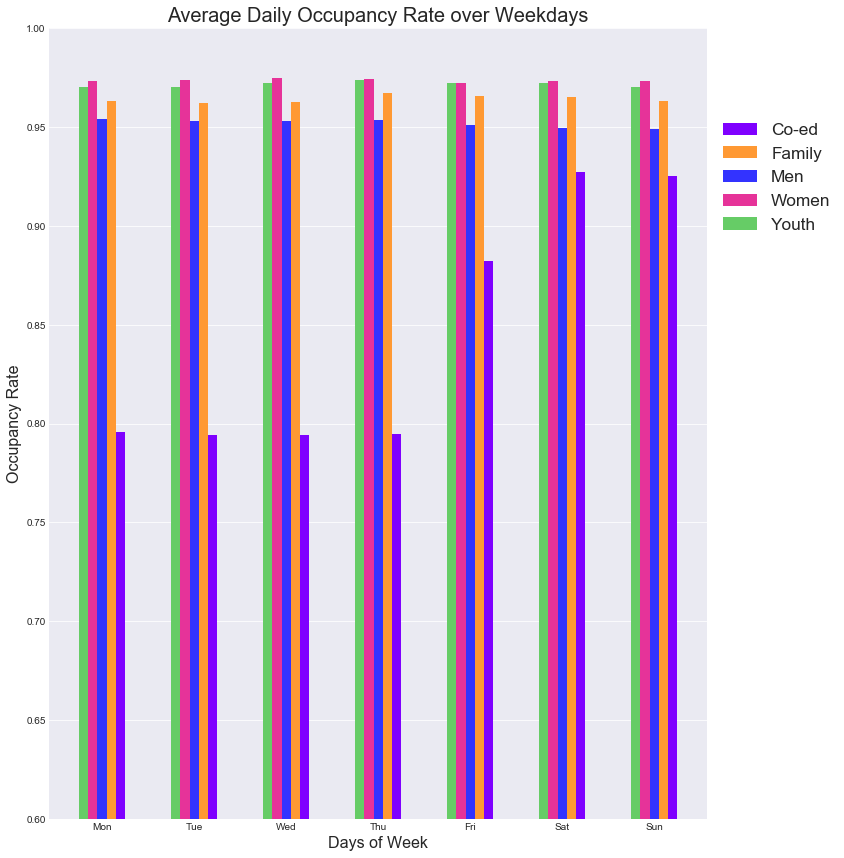

In [31]:
figs,axis=plt.subplots(figsize=(10, 12))
Weekdaylabels=list(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
width=0.3
axis.bar(ts2_wd_c.index*3,ts2_wd_c, label='Co-ed', color=(0.498, 0, 1), width=width )
axis.bar(ts2_wd_f.index*3-width,ts2_wd_f, label='Family', color=(1, 0.6, 0.2),  width=width)
axis.bar(ts2_wd_m.index*3-width*2,ts2_wd_m, label='Men', color=(0.2, 0.2, 1),  width=width)
axis.bar(ts2_wd_w.index*3-width*3,ts2_wd_w, label='Women', color=(0.9, 0.2, 0.6),  width=width)
axis.bar(ts2_wd_y.index*3-width*4,ts2_wd_y, label='Youth', color=(0.4, 0.8, 0.4),  width=width)

axis.set_xticks(ticks=ts2_wd_c.index*3-width*2)
axis.set_xticklabels(Weekdaylabels)

axis.legend(bbox_to_anchor=(1, 0.9),ncol=1, prop={'size':'xx-large'})
axis.set_title('Average Daily Occupancy Rate over Weekdays', fontsize=20)
axis.yaxis.grid(True)
axis.set_ylim((0.6,1))

axis.set_ylabel('Occupancy Rate', fontsize=16)
axis.set_xlabel('Days of Week',  fontsize=16)
figs.tight_layout(pad=1)